In [152]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [153]:
import numpy as np
import pandas as pd
import datetime as dt
# import inspect

# Reflect Tables into SQLAlchemy ORM

In [154]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [155]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [156]:
#create the inspector and connect to the engine
# inspector = inspect(engine) no

In [157]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [158]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [159]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [160]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [161]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
recent_date

'2017-08-23'

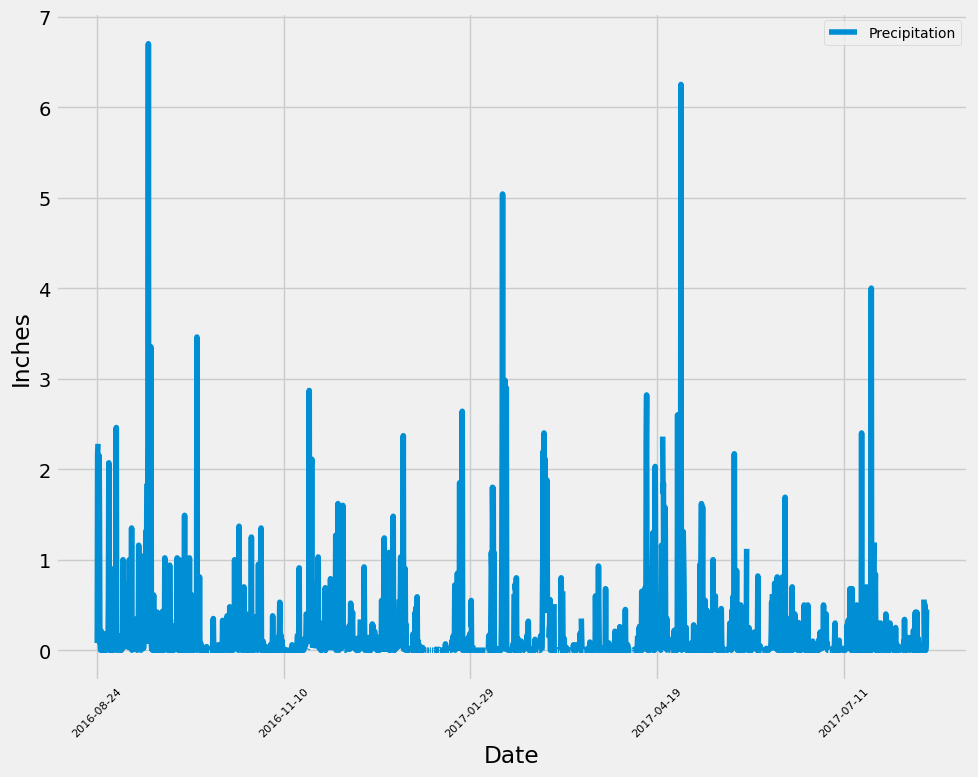

In [162]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# recent_date

# Calculate the date one year from the last date in data set.
prev_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
# prev_year

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-23').order_by(measurement.date).all()
# precip_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = pd.DataFrame(precip_df).set_index('Date')
# precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(alpha=1, figsize=(10,8))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='best', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()


In [163]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_stats = precipitation_df.describe()
precip_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [164]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(station.station).count()
total_stations

9

In [165]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(measurement.station, func.count(measurement.station)).order_by(func.count(measurement.station).desc()).group_by(measurement.station).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [166]:
# # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most_active_stations

# # lowest temperature
# lowest_temp =  
# print(f"The lowest temperature registered in the most active station was {lowest_temp} deegrees.")

# # highest temperature
# highest_temp =  
# print(f"The highest temperature registered in the most active station was {highest_temp} deegrees.")

# # average temperature
# avg_temp =  
# print(f"The average temperature registered in the most active station was {avg_temp} deegrees.")

In [167]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [168]:
# Close Session
session.close()